Dataset Link: https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned/data

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [138]:
Uncleaned_data = pd.read_csv('smartwatch_health_Uncleaned_data.csv')
Uncleaned_data.columns

Index(['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count',
       'Sleep Duration (hours)', 'Activity Level', 'Stress Level'],
      dtype='object')

In [139]:
Uncleaned_data = pd.DataFrame(Uncleaned_data)
Uncleaned_data.isnull().sum()

,0
User ID,201
Heart Rate (BPM),400
Blood Oxygen Level (%),300
Step Count,100
Sleep Duration (hours),150
Activity Level,200
Stress Level,200


In [140]:
data = Uncleaned_data.copy()
#removing Duplicates
data.drop_duplicates(inplace=True)

#drop rows whwre user_id is NaN.
data = data.dropna(subset=['User ID'])

#convert user_id from float to int
data['User ID'] = data['User ID'].astype(int)
data

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
2,1860,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
...,...,...,...,...,...,...,...
9995,1524,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907,NaN,98.401058,3364.788855,5.691233932149209,Active,8


In [141]:
#cleaning sleep duration column
data['Sleep Duration (hours)'] = data['Sleep Duration (hours)'].replace('ERROR','0').astype('float64')

#cleaning activity column
data['Activity Level'] = data['Activity Level'].str.replace('_',' ')
data['Activity Level'] = data['Activity Level'].str.replace('Actve','Active')
data['Activity Level'] = data['Activity Level'].str.replace('Seddentary','Sedentary')
data['Activity Level'] = data['Activity Level'].str.strip().str.lower()
data

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.939776,98.809650,5450.390578,7.167236,highly active,1
2,1860,247.803052,97.052954,2826.521994,0.000000,highly active,5
3,2294,40.000000,96.894213,13797.338044,7.367790,active,3
4,2130,61.950165,98.583797,15679.067648,NaN,highly active,6
5,2095,96.285938,94.202910,10205.992256,8.378343,highly active,10
...,...,...,...,...,...,...,...
9995,1524,78.819386,98.931927,2948.491953,7.402749,active,7
9996,4879,48.632659,95.773035,4725.623070,6.382166,sedentary,2
9997,2624,73.834442,97.945874,2571.492060,6.916549,sedentary,4
9998,4907,NaN,98.401058,3364.788855,5.691234,active,8


In [142]:
#cleaning stress level column
data['Stress Level'] = data['Stress Level'].replace('Very High',9)


# Dealing with NaN values

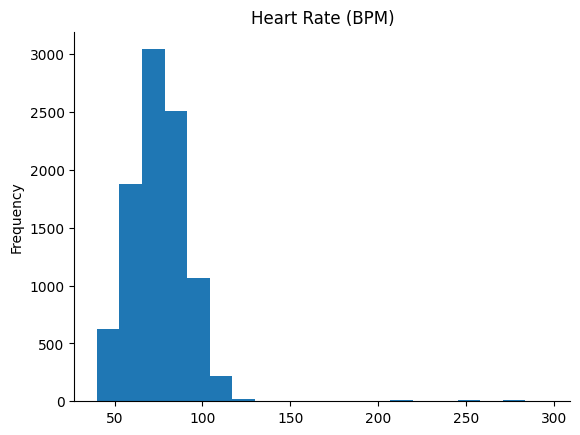

In [143]:
from matplotlib import pyplot as plt
data['Heart Rate (BPM)'].plot(kind='hist', bins=20, title='Heart Rate (BPM)')
plt.gca().spines[['top', 'right',]].set_visible(False)

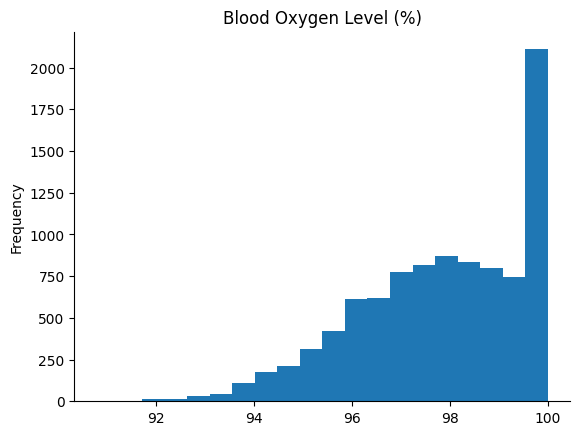

In [144]:
from matplotlib import pyplot as plt
data['Blood Oxygen Level (%)'].plot(kind='hist', bins=20, title='Blood Oxygen Level (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

left skewed

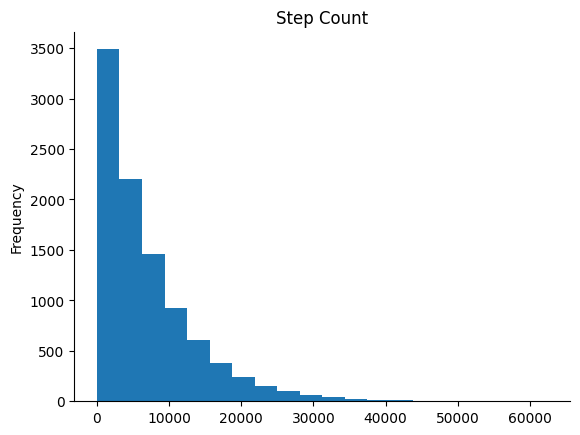

In [145]:
from matplotlib import pyplot as plt
data['Step Count'].plot(kind='hist', bins=20, title='Step Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

right skewed

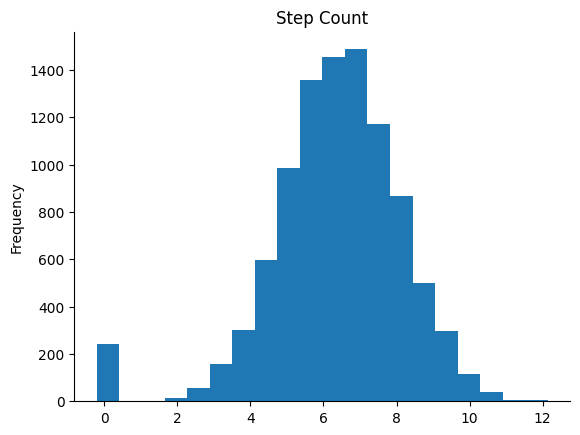

In [146]:
from matplotlib import pyplot as plt
data['Sleep Duration (hours)'].plot(kind='hist', bins=20, title='Step Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [147]:
#replacing NaN value with mode if data is normally distributed/median if data is skewed distributed/replace with mode low variance data
data['Heart Rate (BPM)']= data['Heart Rate (BPM)'].fillna(data['Heart Rate (BPM)'].median())
data['Blood Oxygen Level (%)']= data['Blood Oxygen Level (%)'].fillna(data['Blood Oxygen Level (%)'].median())
data['Step Count']= data['Step Count'].fillna(data['Step Count'].median())
data['Sleep Duration (hours)']= data['Sleep Duration (hours)'].fillna(data['Sleep Duration (hours)'].median())
data['Stress Level']= data['Stress Level'].fillna(data['Stress Level'].mode()[0])
data['Activity Level']= data['Activity Level'].fillna(data['Activity Level'].mode()[0])
data

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.939776,98.809650,5450.390578,7.167236,highly active,1
2,1860,247.803052,97.052954,2826.521994,0.000000,highly active,5
3,2294,40.000000,96.894213,13797.338044,7.367790,active,3
4,2130,61.950165,98.583797,15679.067648,6.448222,highly active,6
5,2095,96.285938,94.202910,10205.992256,8.378343,highly active,10
...,...,...,...,...,...,...,...
9995,1524,78.819386,98.931927,2948.491953,7.402749,active,7
9996,4879,48.632659,95.773035,4725.623070,6.382166,sedentary,2
9997,2624,73.834442,97.945874,2571.492060,6.916549,sedentary,4
9998,4907,75.208240,98.401058,3364.788855,5.691234,active,8


In [148]:
# rounding up all value to 2 decimal point
data['Heart Rate (BPM)'] = np.round(data['Heart Rate (BPM)'],2)
data['Blood Oxygen Level (%)'] = np.round(data['Blood Oxygen Level (%)'],2)
data['Sleep Duration (hours)'] = np.round(data['Sleep Duration (hours)'],0)
data['Step Count'] = np.round(data['Step Count'],0)
data['Stress Level'] = data['Stress Level'].astype(float)

#checking for outliers

<Axes: >

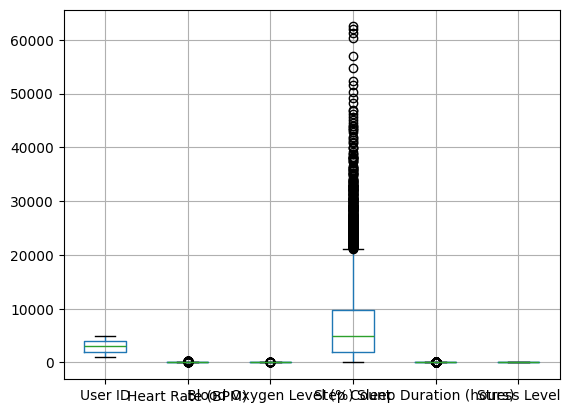

In [149]:
data.boxplot()

<Axes: >

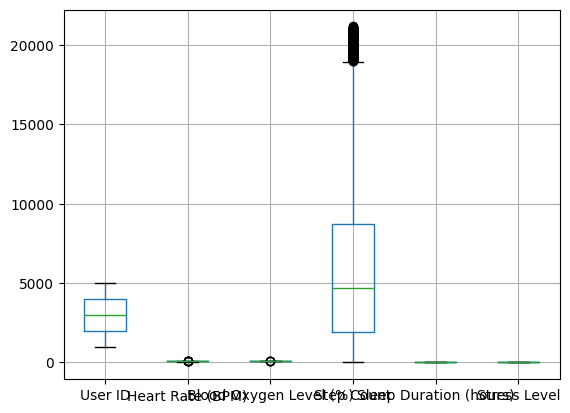

In [150]:


#removing outliers by IQR(Interquartile Range) method
def remove_outliers(data, cols):
    for col in cols:
        Q1, Q3 = data[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
    return data

columns_to_check = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level']
data = remove_outliers(data, columns_to_check)
data.boxplot()

now the number of outliers are reduced.

In [151]:
data

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.94,98.81,5450.0,7.0,highly active,1.0
3,2294,40.00,96.89,13797.0,7.0,active,3.0
4,2130,61.95,98.58,15679.0,6.0,highly active,6.0
5,2095,96.29,94.20,10206.0,8.0,highly active,10.0
6,4772,47.27,95.39,3209.0,8.0,sedentary,2.0
...,...,...,...,...,...,...,...
9995,1524,78.82,98.93,2948.0,7.0,active,7.0
9996,4879,48.63,95.77,4726.0,6.0,sedentary,2.0
9997,2624,73.83,97.95,2571.0,7.0,sedentary,4.0
9998,4907,75.21,98.40,3365.0,6.0,active,8.0


The dataset still contains some inconsistent or nonsensical values.
*   sleep duration : non-negative less than 24 hours
*   Step Count: Should be ≥ 0
*   Stress Level: Should be 1-10
*   normal heart rate range : 40 - 200







In [152]:
data = data[(data['Heart Rate (BPM)'] <= 200) & (data['Heart Rate (BPM)'] >= 40)]
data = data[(data['Blood Oxygen Level (%)'] <= 100) & (data['Blood Oxygen Level (%)'] >= 90)]
data = data[(data['Step Count'] >= 0)]
data = data[(data['Sleep Duration (hours)'] <= 24) & (data['Sleep Duration (hours)'] > 0)]
data = data[(data['Stress Level'] <= 10) & (data['Stress Level'] >= 1)]

In [153]:
data['Stress Level'] = data['Stress Level'].astype(int)
data['Step Count'] = data['Step Count'].astype(int)
data['Sleep Duration (hours)'] = data['Sleep Duration (hours)'].astype(int)

index resetting

In [154]:
data = data.reset_index(drop = True)
data.head(5)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.94,98.81,5450,7,highly active,1
1,2294,40.00,96.89,13797,7,active,3
2,2130,61.95,98.58,15679,6,highly active,6
3,2095,96.29,94.20,10206,8,highly active,10
4,4772,47.27,95.39,3209,8,sedentary,2


In [ ]:
# data.to_csv('Stop_Watch_Health_Cleaned_Data.csv', index=False)